In [11]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize Data (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN (Add 1 channel for grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Paths for Model & Training History
MODEL_PATH = "digit_detector_model.keras"
HISTORY_PATH = "training_history.json"


In [12]:
# Check if model is already trained & saved
if os.path.exists(MODEL_PATH) and os.path.exists(HISTORY_PATH):
    print("Pre-trained model and history found. Skipping training.")
else:
    print("Training new model...")

    # Build Model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compile Model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train Model
    history = model.fit(x_train, y_train, epochs=6, validation_split=0.1, batch_size=64)

    # Save Model
    model.save(MODEL_PATH)
    print(f"Model saved as '{MODEL_PATH}'.")

    # Save Training History
    with open(HISTORY_PATH, 'w') as f:
        json.dump(history.history, f)
    print(f"Training history saved as '{HISTORY_PATH}'.")


Training new model...


C:\Users\asher\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8183 - loss: 0.5524 - val_accuracy: 0.9812 - val_loss: 0.0629
Epoch 2/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9680 - loss: 0.1106 - val_accuracy: 0.9870 - val_loss: 0.0409
Epoch 3/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9759 - loss: 0.0787 - val_accuracy: 0.9880 - val_loss: 0.0422
Epoch 4/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9808 - loss: 0.0621 - val_accuracy: 0.9907 - val_loss: 0.0319
Epoch 5/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9836 - loss: 0.0523 - val_accuracy: 0.9913 - val_loss: 0.0290
Epoch 6/6
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9858 - loss: 0.0443 - val_accuracy: 0.9905 - val_loss: 0.0308
Model saved as 'digit_detector_model.keras'.
Training history saved as 'training_history.json'.


Loaded model from 'digit_detector_model.keras'.
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9886 - loss: 0.0326
Test Accuracy: 0.99


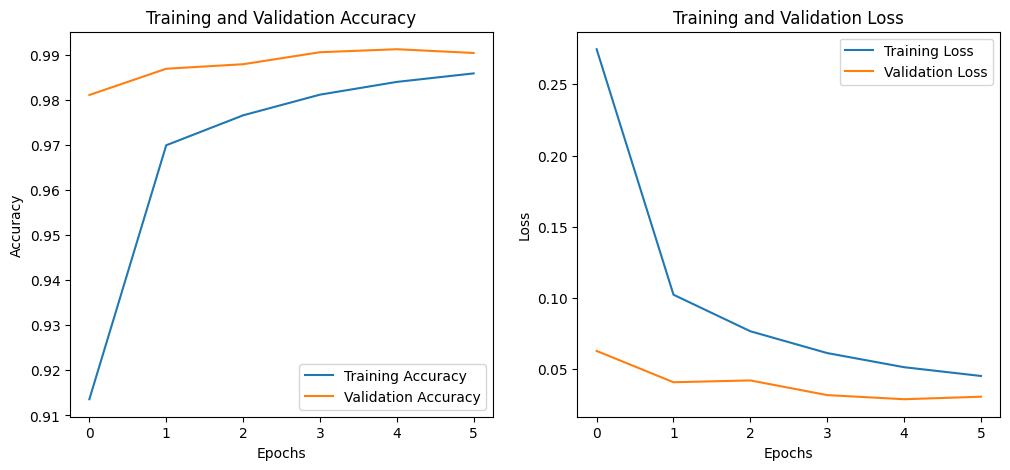

In [13]:
# Load trained model
model = load_model(MODEL_PATH)
print(f"Loaded model from '{MODEL_PATH}'.")

# Load Training History
if os.path.exists(HISTORY_PATH):
    with open(HISTORY_PATH, 'r') as f:
        history = json.load(f)
else:
    print("Training history not found! Please retrain the model.")
    history = None

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot graphs only if history exists
if history:
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()
else:
    print("No training history available to plot.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


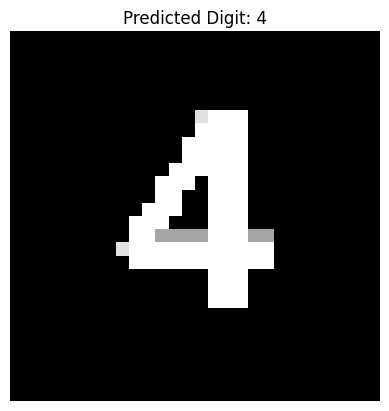

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


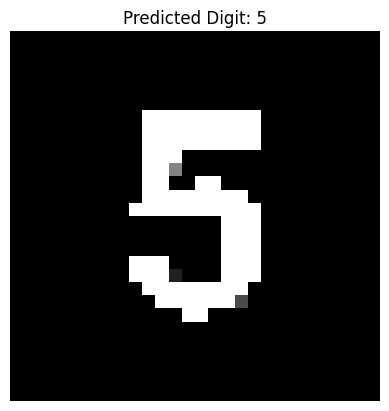

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


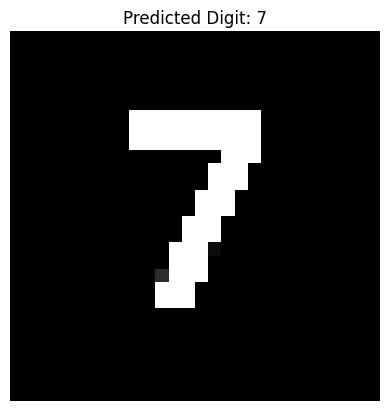

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


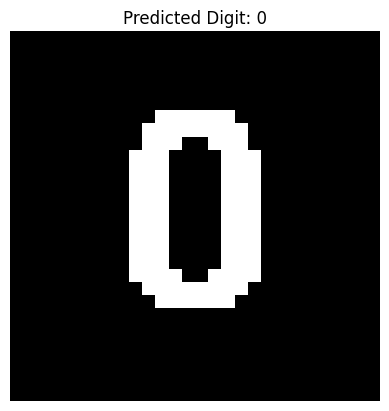

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_digit(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return None

    img = cv2.resize(img, (28, 28))  # Resize to 28x28
    img = img / 255.0  # Normalize
    img = img.reshape(1, 28, 28, 1)  # Reshape for model

    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)

    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis('off')
    plt.show()

    return predicted_digit

# List of image paths
image_paths = [
    r'C:\Users\asher\PycharmProjects\MNIST\customeimage\4.png',
    r'C:\Users\asher\PycharmProjects\MNIST\customeimage\5.png',
    r'C:\Users\asher\PycharmProjects\MNIST\customeimage\7.png',
    r'C:\Users\asher\PycharmProjects\MNIST\customeimage\0.png'
   # r'C:\Users\asher\PycharmProjects\MNIST\customeimage\2.png'
]

# Predict for each image
for img_path in image_paths:
    predict_digit(img_path)
